In [60]:
import numpy as np 
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [61]:
df = pd.read_csv('bankloans.csv')

In [62]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [63]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age     ed  employ  address  income  debtinc  creddebt  othdebt  \
0     False  False   False    False   False    False     False    False   
1     False  False   False    False   False    False     False    False   
2     False  False   False    False   False    False     False    False   
3     False  False   False    False   False    False     False    False   
4     False  False   False    False   False    False     False    False   
...     ...    ...     ...      ...     ...      ...       ...      ...   
1145  False  False   False    False   False    False     False    False   
1146  False  False   False    False   False    False     False    False   
1147  False  False   False    False   False    False     False    False   
1148  False  False   False    False   False    False     False    False   
1149  False  False   False    False   False    False     False    False   

      default  
0       False  
1    

In [64]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

In [65]:
df=df.dropna()

In [66]:
#ploting the data

<Axes: xlabel='age', ylabel='income'>

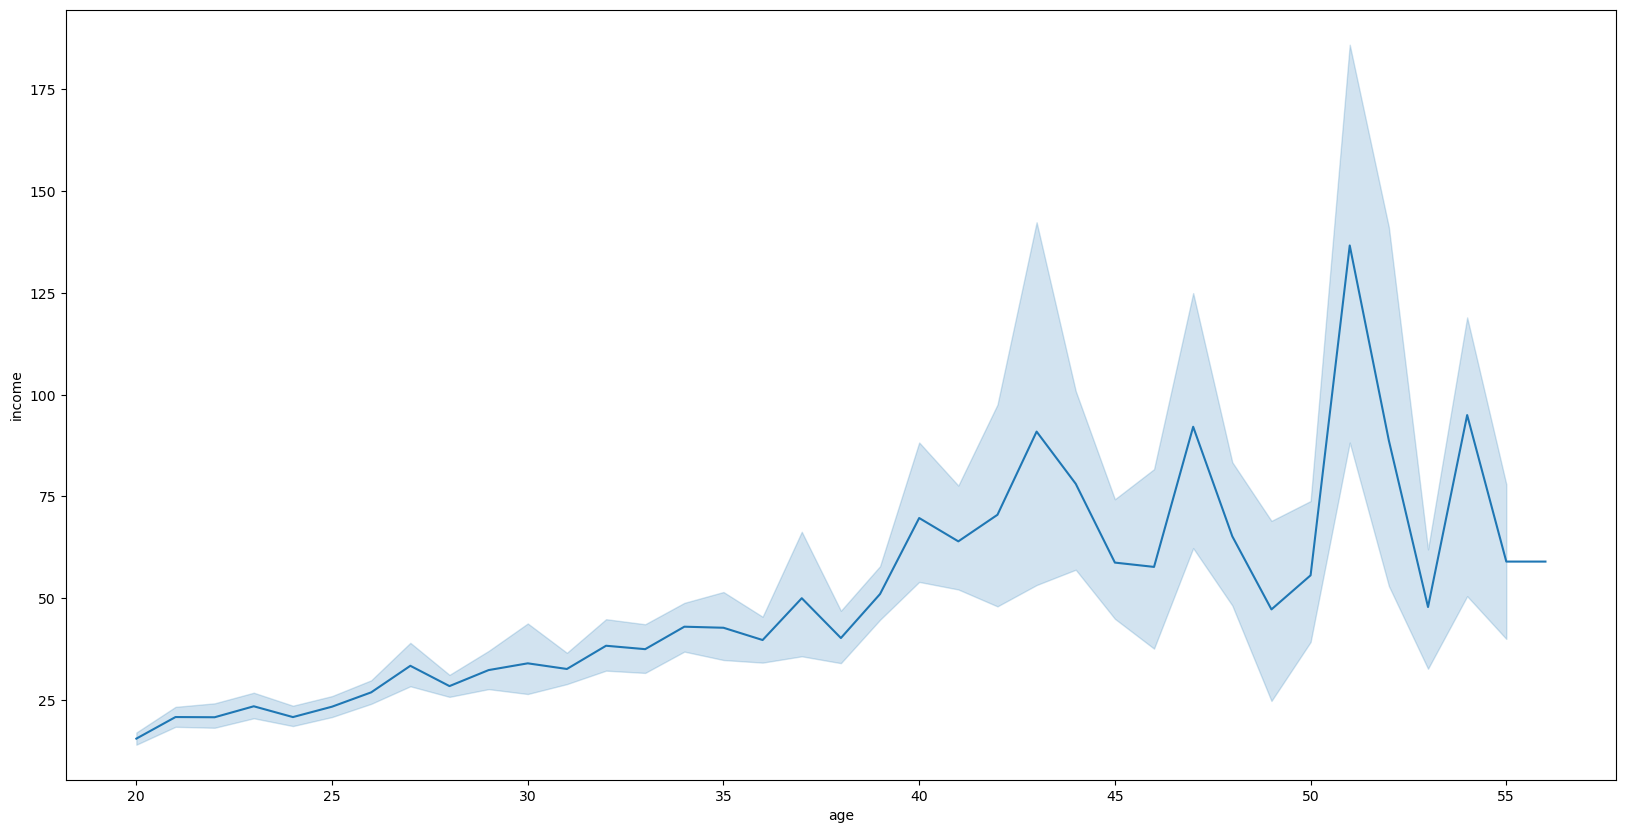

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
sns. lineplot (x='age', y='income', data=df, ax=ax)

In [68]:
df. value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

In [69]:
df = df. dropna ( )

<Axes: xlabel='age', ylabel='debtinc'>

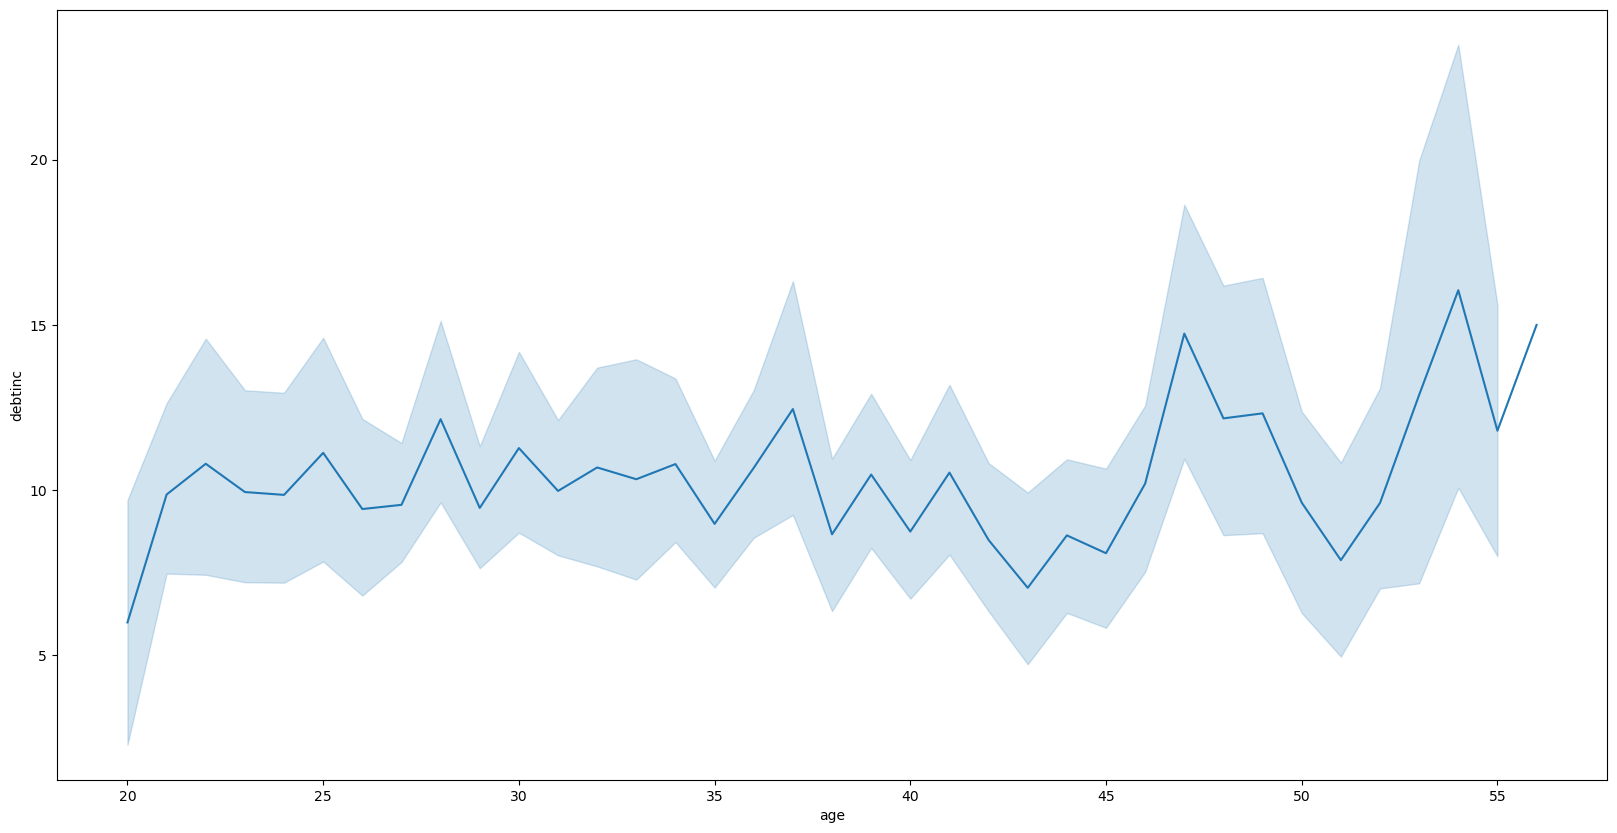

In [70]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age', y='debtinc',data=df,ax=ax)

In [71]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [72]:
x=df. drop(['default'], axis=1)
y=df ['default' ]

In [73]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [74]:
sc = StandardScaler()
xtrain=sc. fit_transform(xtrain)
xtest=sc. fit_transform(xtest)

In [75]:
#***creating a models***

In [76]:
#random forest

In [77]:
rfc = RandomForestClassifier(n_estimators=200)

In [78]:
rfc. fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [79]:
rfc.score(xtest,ytest)

0.8

In [80]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain, y=ytrain, cv=10)
rfc2. mean()

0.7875000000000001

In [81]:
#SVM

In [82]:
sv = SVC()
sv. fit(xtrain, ytrain)

SVC()

In [83]:
sv. score(xtest, ytest)

0.7928571428571428

In [84]:
#SVM with parameters

In [85]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [86]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [87]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [88]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

In [89]:
#***logistic regresion

In [90]:
lr = LogisticRegression()
lr. fit(xtrain, ytrain)
lr. score(xtest, ytest)

0.8357142857142857

In [91]:
#***DecisionTree*** algorithm

In [92]:
dt = DecisionTreeClassifier()

In [93]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [94]:
score = dt.score(xtest, ytest)

In [95]:
print(f"Model accuracy: {score}")

Model accuracy: 0.7571428571428571


In [96]:
#heatmap

<Axes: >

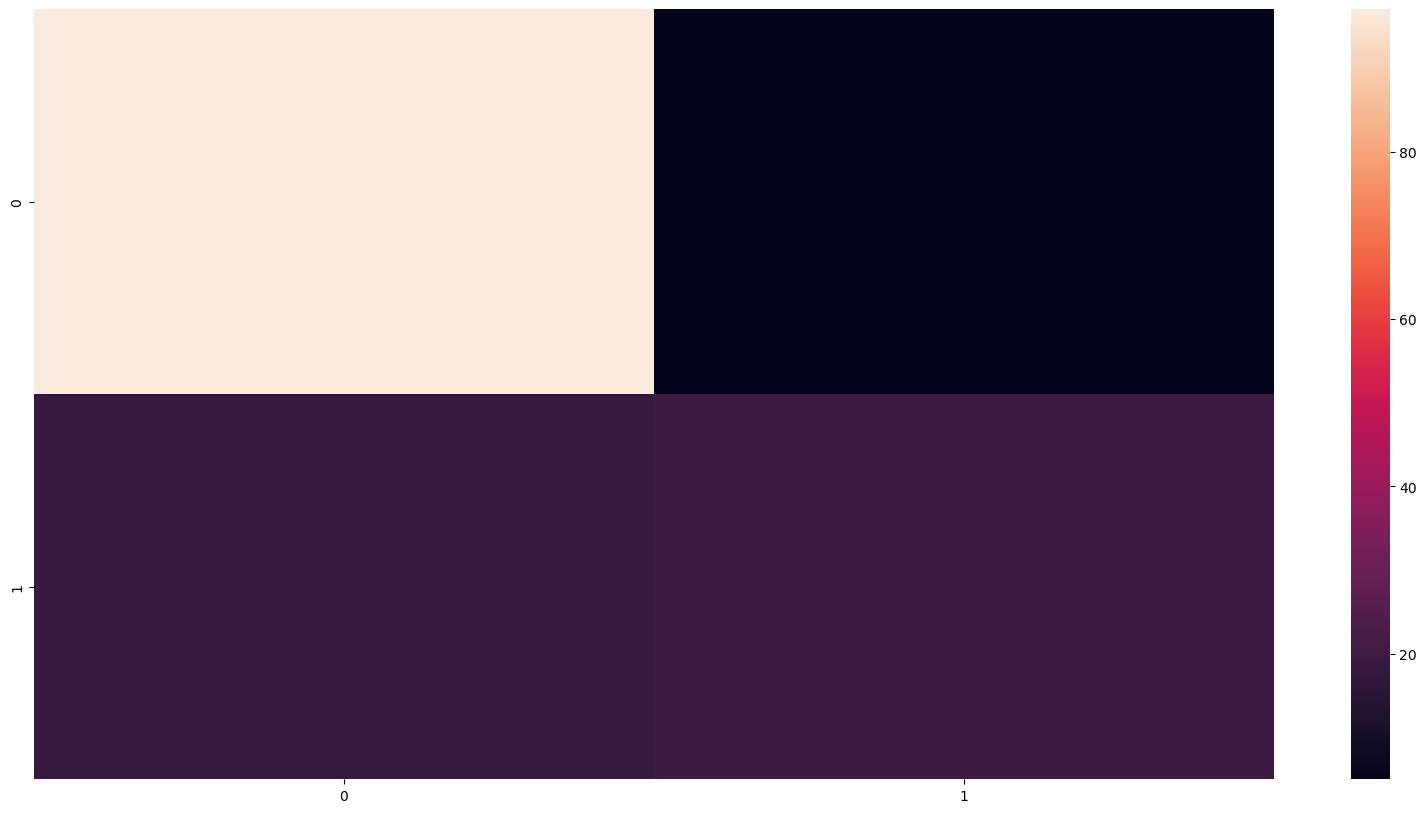

In [97]:
yp = lr. predict(xtest)
c= confusion_matrix(ytest, yp)
fig, ax = plt. subplots(figsize=(20,10))
sns. heatmap(c, ax=ax)

In [98]:
#confusion_matrix

In [99]:
####.  TP, FP, Recall, Precision,Accuracy

In [100]:
#DecisionTreeClassifier

In [101]:
# Generate the confusion matrix
cm_dt = confusion_matrix(ytest, ypred_dt)
print("Confusion Matrix for Decision Tree:")
print(cm_dt)

# Extract TP, FP, TN, FN from the confusion matrix
TN_dt, FP_dt, FN_dt, TP_dt = cm_dt.ravel()

# Calculate the metrics
accuracy_dt = accuracy_score(ytest, ypred_dt)
precision_dt = precision_score(ytest, ypred_dt)
recall_dt = recall_score(ytest, ypred_dt)

print(f"True Positive (TP): {TP_dt}")
print(f"False Positive (FP): {FP_dt}")
print(f"Recall: {recall_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Accuracy: {accuracy_dt:.2f}")


NameError: name 'ypred_dt' is not defined

In [102]:
#LogisticRegression

In [103]:
cm_lr = confusion_matrix(ytest, ypred_lr)
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# Extract TP, FP, TN, FN from the confusion matrix
TN_lr, FP_lr, FN_lr, TP_lr = cm_lr.ravel()

# Calculate the metrics
accuracy_lr = accuracy_score(ytest, ypred_lr)
precision_lr = precision_score(ytest, ypred_lr)
recall_lr = recall_score(ytest, ypred_lr)

print(f"True Positive (TP): {TP_lr}")
print(f"False Positive (FP): {FP_lr}")
print(f"Recall: {recall_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Accuracy: {accuracy_lr:.2f}")


NameError: name 'ypred_lr' is not defined

In [58]:
#SVM

In [107]:
# Generate the confusion matrix
cm_svm = confusion_matrix(ytest, ypred_svm)
print("Confusion Matrix for SVM:")
print(cm_svm)

# Extract TP, FP, TN, FN from the confusion matrix
TN_svm, FP_svm, FN_svm, TP_svm = cm_svm.ravel()

# Calculate the metrics
accuracy_svm = accuracy_score(ytest, ypred_svm)
precision_svm = precision_score(ytest, ypred_svm)
recall_svm = recall_score(ytest, ypred_svm)

print(f"True Positive (TP): {TP_svm}")
print(f"False Positive (FP): {FP_svm}")
print(f"Recall: {recall_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Accuracy: {accuracy_svm:.2f}")


Confusion Matrix for SVM:
[[99  3]
 [26 12]]
True Positive (TP): 12
False Positive (FP): 3
Recall: 0.32
Precision: 0.80
Accuracy: 0.79


In [60]:
#RandomForestClassifier

In [108]:
# Generate the confusion matrix
cm_rf = confusion_matrix(ytest, ypred_rf)
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Extract TP, FP, TN, FN from the confusion matrix
TN_rf, FP_rf, FN_rf, TP_rf = cm_rf.ravel()

# Calculate the metrics
accuracy_rf = accuracy_score(ytest, ypred_rf)
precision_rf = precision_score(ytest, ypred_rf)
recall_rf = recall_score(ytest, ypred_rf)

print(f"True Positive (TP): {TP_rf}")
print(f"False Positive (FP): {FP_rf}")
print(f"Recall: {recall_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Accuracy: {accuracy_rf:.2f}")


Confusion Matrix for Random Forest:
[[95  7]
 [22 16]]
True Positive (TP): 16
False Positive (FP): 7
Recall: 0.42
Precision: 0.70
Accuracy: 0.79


In [1]:
!pip install matplotlib

ValueError: 'o-maroon' is not a valid format string (unrecognized character 'a')

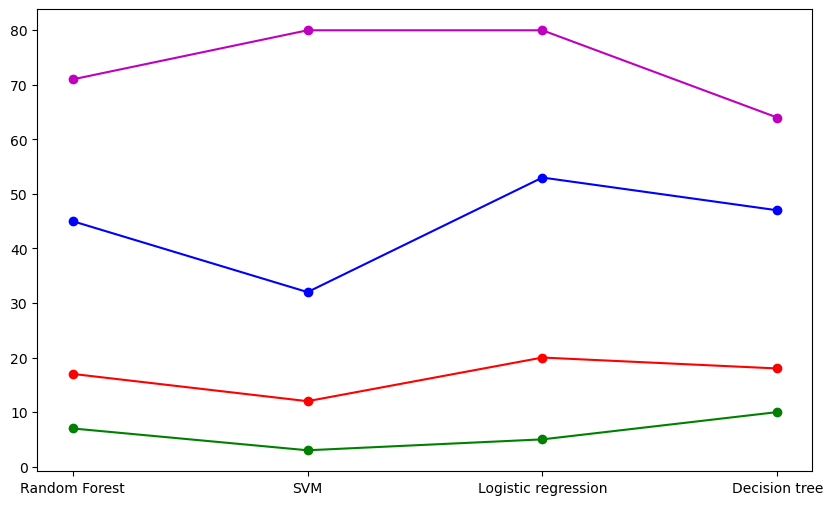

In [2]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'SVM', 'Logistic regression', 'Decision tree']
tp = [17, 12, 20, 18]
fp = [7, 3, 5, 10]
recall = [45, 32, 53, 47]
precision = [71, 80, 80, 64]
accuracy = [79, 79, 84, 78]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, tp, 'o-r', label='TP')
plt.plot(models, fp, 'o-g', label='FP')
plt.plot(models, recall, 'o-b', label='Recall')
plt.plot(models, precision, 'o-m', label='Precision')
plt.plot(models, accuracy, 'o-maroon', label='Accuracy')

plt.xlabel('Models')
plt.ylabel('Values')
plt.ylim(0, 100)
plt.legend(loc='upper left')

plt.title('Model Comparison')

plt.show()


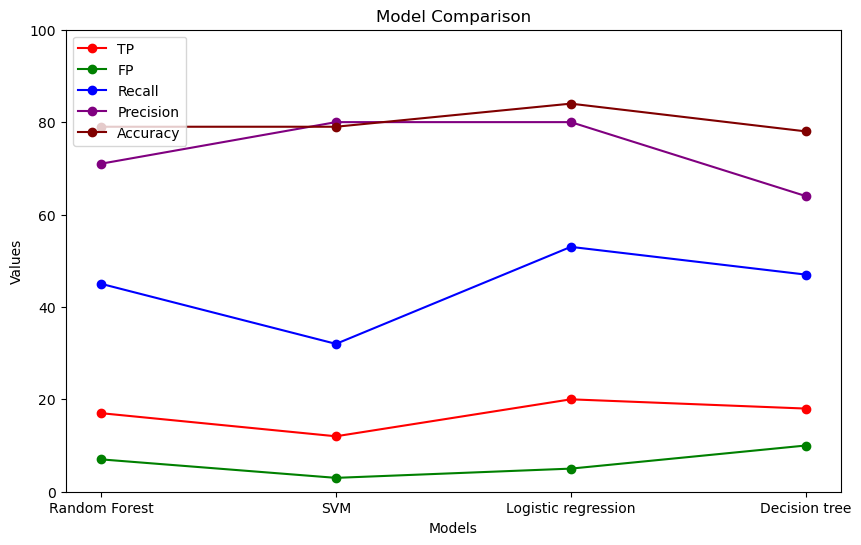

In [3]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'SVM', 'Logistic regression', 'Decision tree']
tp = [17, 12, 20, 18]
fp = [7, 3, 5, 10]
recall = [45, 32, 53, 47]
precision = [71, 80, 80, 64]
accuracy = [79, 79, 84, 78]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, tp, 'o-', color='red', label='TP')
plt.plot(models, fp, 'o-', color='green', label='FP')
plt.plot(models, recall, 'o-', color='blue', label='Recall')
plt.plot(models, precision, 'o-', color='purple', label='Precision')
plt.plot(models, accuracy, 'o-', color='maroon', label='Accuracy')

plt.xlabel('Models')
plt.ylabel('Values')
plt.ylim(0, 100)
plt.legend(loc='upper left')

plt.title('Model Comparison')

plt.show()


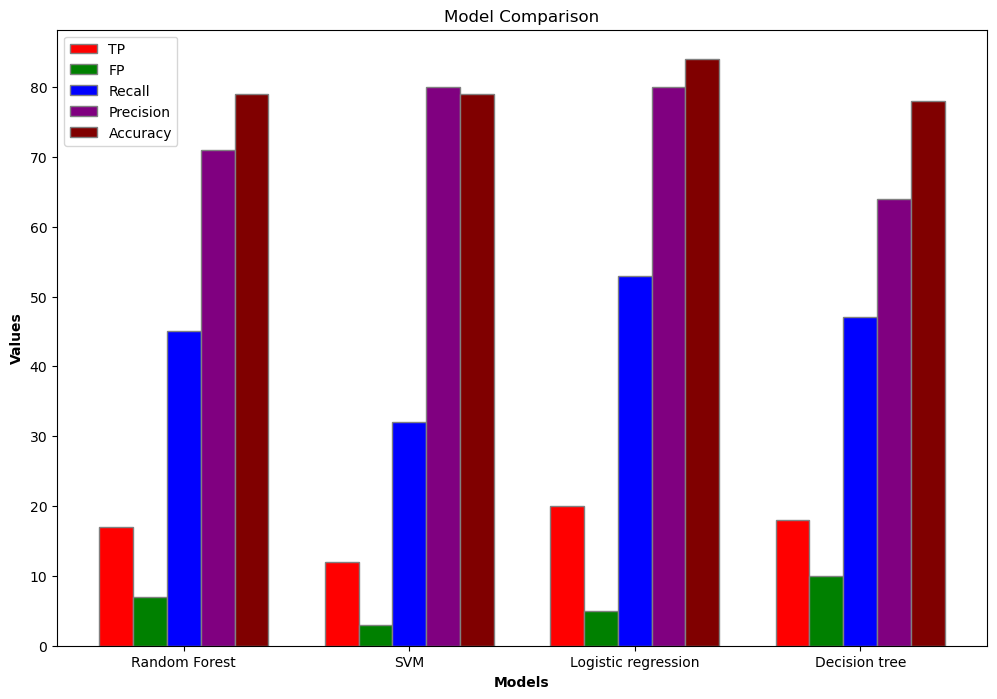

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'SVM', 'Logistic regression', 'Decision tree']
tp = [17, 12, 20, 18]
fp = [7, 3, 5, 10]
recall = [45, 32, 53, 47]
precision = [71, 80, 80, 64]
accuracy = [79, 79, 84, 78]

# Bar width
bar_width = 0.15

# Positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Plotting
plt.figure(figsize=(12, 8))

plt.bar(r1, tp, color='red', width=bar_width, edgecolor='grey', label='TP')
plt.bar(r2, fp, color='green', width=bar_width, edgecolor='grey', label='FP')
plt.bar(r3, recall, color='blue', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, precision, color='purple', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r5, accuracy, color='maroon', width=bar_width, edgecolor='grey', label='Accuracy')

# Adding labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + 2 * bar_width for r in range(len(models))], models)

# Adding legend
plt.legend()

# Display the plot
plt.title('Model Comparison')
plt.show()


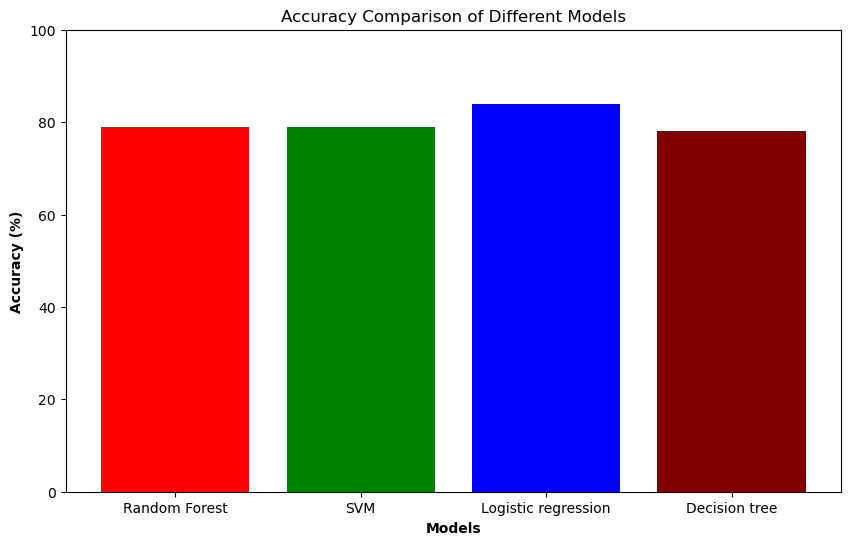

In [6]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'SVM', 'Logistic regression', 'Decision tree']
accuracy = [79, 79, 84, 78]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(models, accuracy, color=['red', 'green', 'blue', 'maroon'])

# Adding labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.ylim(0, 100)
plt.title('Accuracy Comparison of Different Models')

# Display the plot
plt.show()


In [62]:
#by using LSTM

In [63]:
pip install numpy pandas scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

In [107]:
## Sample Data Generation for demonstration purposes
# Assuming the dataset has the following structure:
# | feature1 | feature2 | ... | featureN | target |

In [108]:
np.random.seed(0)
sample_size = 1000
features = 10

In [109]:
## Features and target

In [110]:
df = pd.DataFrame(np.random.randn(sample_size, features), columns=[f'feature{i}' for i in range(1, features+1)])
df['target'] = np.random.randint(2, size=sample_size)

In [111]:
## Standardize features

In [112]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [113]:
## Reshape data to be 3D [samples, timesteps, features]
# Here we assume a timestep of 1 for simplicity since we do not have sequential data

In [114]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [115]:
## Train-test split

In [116]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [117]:
## Build the LSTM model

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Compile the model

In [120]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/Users/abhinavreddychilkuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [121]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [122]:
#Compile the model

In [123]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [345]:
## Train the model

In [346]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4648 - loss: 0.6992 - val_accuracy: 0.5000 - val_loss: 0.6971
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5388 - loss: 0.6897 - val_accuracy: 0.5375 - val_loss: 0.6954
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4861 - loss: 0.6945 - val_accuracy: 0.5437 - val_loss: 0.6949
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5085 - loss: 0.6901 - val_accuracy: 0.5125 - val_loss: 0.6955
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5331 - loss: 0.6870 - val_accuracy: 0.5250 - val_loss: 0.6953
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5484 - loss: 0.6861 - val_accuracy: 0.5125 - val_loss: 0.6951
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5467 - loss: 0.6846 - val_accuracy: 0.5250 - val_loss: 0.6957
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5601 - loss: 0.6851 - val_accuracy: 0.5437 - val_loss:

In [347]:
#evaluate the model

In [124]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {accuracy*100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.4738 - loss: 0.6962
Accuracy: 46.50%


In [86]:
#incressing the accuracy

In [125]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sample data (replace with your actual data)
X = np.random.rand(100, 10, 2)  # Example shape: (samples, timesteps, features)
y = np.random.randint(0, 2, (100, 1))  # Example shape: (samples, output_dim)

# Normalize the features
scaler = StandardScaler()
X = np.reshape(X, (X.shape[0] * X.shape[1], X.shape[2]))
X = scaler.fit_transform(X)
X = np.reshape(X, (100, 10, 2))

# Data augmentation
def augment_data(X, y):
    augmented_X = []
    augmented_y = []
    for i in range(X.shape[0]):
        for _ in range(5):  # 5 times augmentation
            noise = np.random.normal(0, 0.01, X[i].shape)
            augmented_X.append(X[i] + noise)
            augmented_y.append(y[i])
    return np.array(augmented_X), np.array(augmented_y)

X, y = augment_data(X, y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Shape of X_train: (400, 10, 2)
Shape of y_train: (400, 1)
Epoch 1/200


/Users/abhinavreddychilkuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5743 - loss: 0.7967 - val_accuracy: 0.5125 - val_loss: 0.6926 - learning_rate: 0.0010
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5554 - loss: 0.7754 - val_accuracy: 0.5125 - val_loss: 0.6942 - learning_rate: 0.0010
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6002 - loss: 0.7082 - val_accuracy: 0.5125 - val_loss: 0.6951 - learning_rate: 0.0010
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5798 - loss: 0.7277 - val_accuracy: 0.5125 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6379 - loss: 0.6779 - val_accuracy: 0.5125 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6353 - loss: 0.6508 - val_accuracy: 0.5375 - val_loss: 0.6976 - learning_rate: 0.0010
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6216 - loss: 0.7084 - val_accuracy: 0.4

Epoch 87/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8711 - loss: 0.3161 - val_accuracy: 0.9250 - val_loss: 0.2131 - learning_rate: 2.0000e-04
Epoch 88/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8338 - loss: 0.4121 - val_accuracy: 0.9250 - val_loss: 0.2082 - learning_rate: 2.0000e-04
Epoch 89/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8776 - loss: 0.2844 - val_accuracy: 0.9250 - val_loss: 0.2038 - learning_rate: 2.0000e-04
Epoch 90/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8937 - loss: 0.2656 - val_accuracy: 0.8875 - val_loss: 0.2034 - learning_rate: 2.0000e-04
Epoch 91/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8842 - loss: 0.2758 - val_accuracy: 0.9125 - val_loss: 0.1898 - learning_rate: 2.0000e-04
Epoch 92/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8759 - loss: 0.3106 - val_accuracy: 0.9250 - val_loss: 0.1930 - learning_rate: 2.0000e-04
Epoch 93/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc

Epoch 130/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9500 - loss: 0.1615 - val_accuracy: 0.9750 - val_loss: 0.0985 - learning_rate: 2.0000e-04
Epoch 131/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9520 - loss: 0.1578 - val_accuracy: 0.9500 - val_loss: 0.1057 - learning_rate: 2.0000e-04
Epoch 132/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8873 - loss: 0.2567 - val_accuracy: 0.9500 - val_loss: 0.0979 - learning_rate: 2.0000e-04
Epoch 133/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9463 - loss: 0.1590 - val_accuracy: 0.9750 - val_loss: 0.0845 - learning_rate: 2.0000e-04
Epoch 134/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9176 - loss: 0.2123 - val_accuracy: 0.9750 - val_loss: 0.0867 - learning_rate: 2.0000e-04
Epoch 135/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9587 - loss: 0.1515 - val_accuracy: 0.9750 - val_loss: 0.0766 - learning_rate: 2.0000e-04
Epoch 136/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Epoch 173/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9809 - loss: 0.0925 - val_accuracy: 0.9875 - val_loss: 0.0450 - learning_rate: 2.0000e-04
Epoch 174/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9781 - loss: 0.0863 - val_accuracy: 1.0000 - val_loss: 0.0310 - learning_rate: 2.0000e-04
Epoch 175/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9741 - loss: 0.1090 - val_accuracy: 1.0000 - val_loss: 0.0216 - learning_rate: 2.0000e-04
Epoch 176/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9854 - loss: 0.0757 - val_accuracy: 1.0000 - val_loss: 0.0207 - learning_rate: 2.0000e-04
Epoch 177/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9793 - loss: 0.1066 - val_accuracy: 1.0000 - val_loss: 0.0226 - learning_rate: 2.0000e-04
Epoch 178/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9679 - loss: 0.1102 - val_accuracy: 1.0000 - val_loss: 0.0224 - learning_rate: 2.0000e-04
Epoch 179/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - a

In [126]:
#best accuracy after adding layers in LSTM 

In [128]:
import numpy as np
from keras.layers import Input, LSTM, Dropout, BatchNormalization, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

# Assuming you have X_train and y_train prepared
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Define the input layer
inputs = Input(shape=input_shape)

# Add LSTM layers
x = LSTM(units=64, return_sequences=True)(inputs)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = LSTM(units=32, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = LSTM(units=16, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

# Output layer
outputs = Dense(units=1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Shape of X_train: (400, 10, 2)
Shape of y_train: (400, 1)
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5282 - loss: 0.8505 - val_accuracy: 0.5125 - val_loss: 0.6928
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5009 - loss: 0.8764 - val_accuracy: 0.4875 - val_loss: 0.6925
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4765 - loss: 0.8660 - val_accuracy: 0.5375 - val_loss: 0.6923
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5192 - loss: 0.8092 - val_accuracy: 0.5125 - val_loss: 0.6923
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5512 - loss: 0.8290 - val_accuracy: 0.5125 - val_loss: 0.6924
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5313 - loss: 0.7925 - val_accuracy: 0.5125 - val_loss: 0.6927
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5883 - loss: 0.7489 - val_accuracy: 0.5125 - val_loss: 0.6929
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy:

Epoch 102/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7956 - loss: 0.4085 - val_accuracy: 0.8375 - val_loss: 0.3946
Epoch 103/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7877 - loss: 0.4323 - val_accuracy: 0.8375 - val_loss: 0.3879
Epoch 104/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8217 - loss: 0.4141 - val_accuracy: 0.8125 - val_loss: 0.3807
Epoch 105/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8243 - loss: 0.4208 - val_accuracy: 0.8125 - val_loss: 0.3713
Epoch 106/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8291 - loss: 0.3687 - val_accuracy: 0.8875 - val_loss: 0.3711
Epoch 107/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8207 - loss: 0.4205 - val_accuracy: 0.8625 - val_loss: 0.3631
Epoch 108/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8368 - loss: 0.4004 - val_accuracy: 0.8875 - val_loss: 0.3675
Epoch 109/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8082 - loss: 0.3829 - val_accuracy: 0.

In [ ]:
# LSTM Confusion Matrix

In [105]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Recall
recall = TP / (TP + FN)
print("Recall:", recall)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)


Confusion Matrix:
[[47  0]
 [ 5 48]]
Recall: 0.9056603773584906
Precision: 1.0
Accuracy: 0.95


In [97]:
#by using ANN 

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming xtrain, ytrain, xtest, and ytest are your training and test data

# Preprocess data
xtrain = np.array(xtrain)
xtest = np.array(xtest)

# Define the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtrain, ytrain, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
accuracy = model.evaluate(xtest, ytest)[1]
print("Accuracy:", accuracy)


Epoch 1/10


/Users/abhinavreddychilkuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.5372 - loss: 0.6871
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.7756 - loss: 0.5378
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.7597 - loss: 0.4997
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.7911 - loss: 0.4465
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8130 - loss: 0.4254
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8028 - loss: 0.4141
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.7891 - loss: 0.4539
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8291 - loss: 0.3932
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.7938 - loss: 0.4130
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.8264 - loss: 0.3894
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8552 - loss: 0.3652
Accuracy: 0.8428571224212646


In [ ]:
#ANN confusion matrix

In [81]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred)

# True Positives, False Positives
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]

# Recall, Precision, Accuracy
recall = recall_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
accuracy = accuracy_score(ytest, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("True Positives:", TP)
print("False Positives:", FP)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)


Confusion Matrix:
[[94  8]
 [14 24]]
True Positives: 24
False Positives: 8
Recall: 0.631578947368421
Precision: 0.75
Accuracy: 0.8428571428571429


In [132]:
#roc curve for LSTM

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


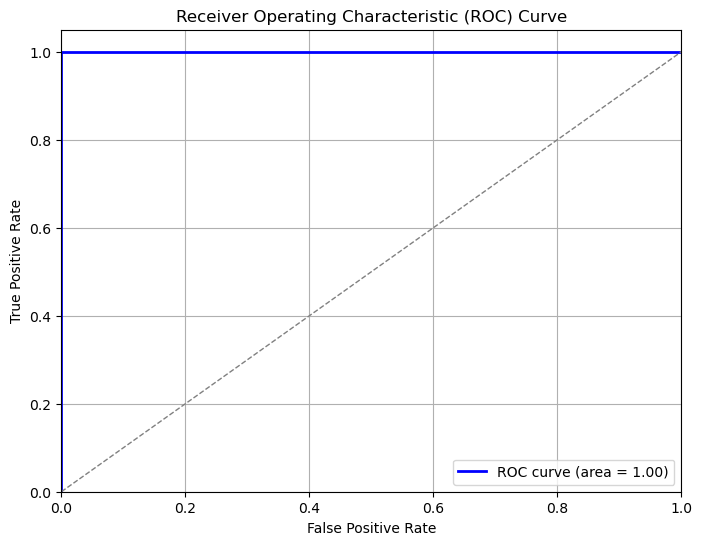

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.layers import Input, LSTM, Dropout, BatchNormalization, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

# Assuming you have X and y prepared
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Define the input layer
inputs = Input(shape=input_shape)

# Add LSTM layers
x = LSTM(units=64, return_sequences=True)(inputs)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = LSTM(units=32, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = LSTM(units=16, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

# Output layer
outputs = Dense(units=1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [135]:
#roc for ann

Epoch 1/10


/Users/abhinavreddychilkuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.4903 - loss: 0.6941
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.7591 - loss: 0.5699
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7695 - loss: 0.5203
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.7933 - loss: 0.4588
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.8028 - loss: 0.4251
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.8090 - loss: 0.4478
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.7910 - loss: 0.4350
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8055 - loss: 0.4135
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8067 - loss: 0.3974
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.7964 - loss: 0.4098
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8443 - loss: 0.3630
Accuracy: 0.8428571224212646
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


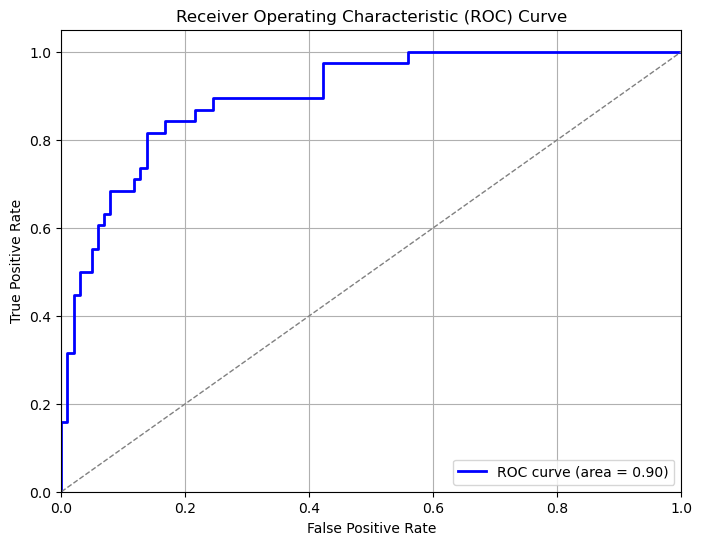

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming xtrain, ytrain, xtest, and ytest are your training and test data

# Convert to numpy arrays if not already
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)

# Define the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtrain, ytrain, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
accuracy = model.evaluate(xtest, ytest)[1]
print("Accuracy:", accuracy)

# Generate predictions
y_pred_probs = model.predict(xtest).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
